# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



# 2.3 Visualizing Relationships Between Categorical Features — Titanic

Goal: make two character profiles for a Titanic reboot:
1) most likely to survive, and 2) least likely to survive.  
I’ll support the profiles using simple visuals and tables for these features:

- Age, Fare (quantitative → I’ll place people into categories with `.loc`)
- Sex
- Passenger class (Pclass)
- Travel companions (parents/children + siblings/spouse)
- Port of departure (Embarked)

At the end I’ll pick **one real passenger** for each profile and add one fact I looked up.

In [69]:
# Imports and data load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic_passengers.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Survival labels
The dataset uses numbers (`0` = died, `1` = survived).  
For easier plots I add a text column.

In [72]:
df.loc[df["Survived"] == 0, "Survived_cat"] = "Died"
df.loc[df["Survived"] == 1, "Survived_cat"] = "Survived"

df[["Survived","Survived_cat"]].head()

,Survived,Survived_cat
0,0,Died
1,1,Survived
2,1,Survived
3,1,Survived
4,0,Died


## Quantitative categories

- **AgeGroup**: `Child (0–12)`, `Teen (13–18)`, `Young Adult (19–35)`, `Adult (36–60)`, `Senior (60+)`  
  
- **FareGroup**: `Low`, `Medium`, `High`, `Very High` using the 25th/50th/75th percentiles as cutoffs.

In [75]:
# Age groups
df["AgeGroup"] = "Unknown"

df.loc[(df["Age"] >= 0) & (df["Age"] <= 12), "AgeGroup"] = "Child"
df.loc[(df["Age"] > 12) & (df["Age"] <= 18), "AgeGroup"] = "Teen"
df.loc[(df["Age"] > 18) & (df["Age"] <= 35), "AgeGroup"] = "Young Adult"
df.loc[(df["Age"] > 35) & (df["Age"] <= 60), "AgeGroup"] = "Adult"
df.loc[df["Age"] > 60, "AgeGroup"] = "Senior"

# Fare groups
q1 = df["Fare"].quantile(0.25)
q2 = df["Fare"].quantile(0.50)
q3 = df["Fare"].quantile(0.75)

df["FareGroup"] = "Very High"
df.loc[df["Fare"] <= q1, "FareGroup"] = "Low"
df.loc[(df["Fare"] > q1) & (df["Fare"] <= q2), "FareGroup"] = "Medium"
df.loc[(df["Fare"] > q2) & (df["Fare"] <= q3), "FareGroup"] = "High"

df[["Age","AgeGroup","Fare","FareGroup"]].head(10)

,Age,AgeGroup,Fare,FareGroup
0,22.0,Young Adult,7.2500,Low
1,38.0,Adult,71.2833,Very High
2,26.0,Young Adult,7.9250,Medium
3,35.0,Young Adult,53.1000,Very High
4,35.0,Young Adult,8.0500,Medium
5,NaN,Unknown,8.4583,Medium
6,54.0,Adult,51.8625,Very High
7,2.0,Child,21.0750,High
8,27.0,Young Adult,11.1333,Medium
9,14.0,Teen,30.0708,High


## Age visuals and quick table
I check the relationship between age and survival.

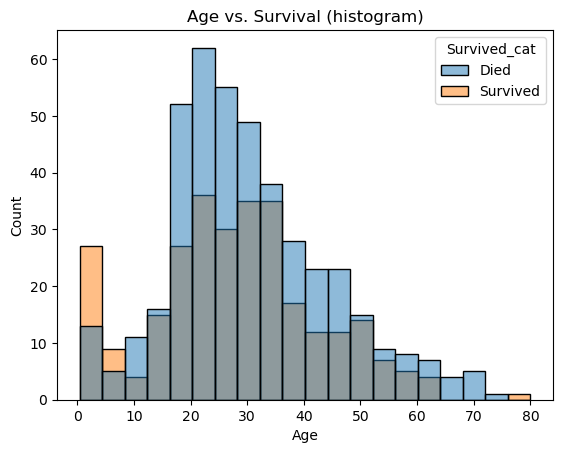

Survived_cat,Died,Survived
AgeGroup,,
Adult,117,78
Child,29,40
Senior,17,5
Teen,40,30
Unknown,125,52
Young Adult,221,137


In [78]:
sns.histplot(x="Age", data=df, hue="Survived_cat", bins=20)
plt.title("Age vs. Survival (histogram)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# crosstab of AgeGroup by Survived_cat
pd.crosstab(df["AgeGroup"], df["Survived_cat"])

## Fare visuals and quick table
Boxplot (fare is very skewed).

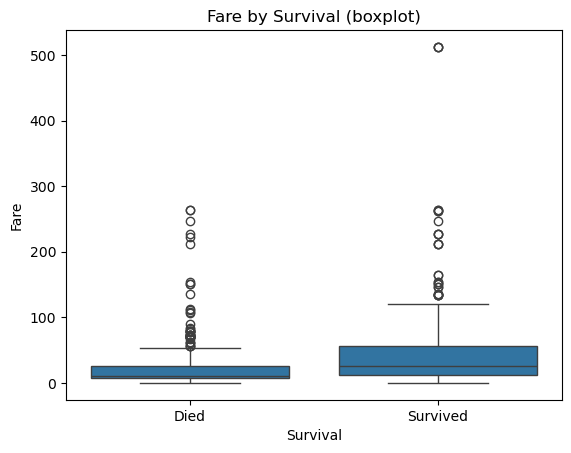

Survived_cat,Died,Survived
FareGroup,,
High,121,101
Low,179,44
Medium,156,68
Very High,93,129


In [81]:
sns.boxplot(x="Survived_cat", y="Fare", data=df)
plt.title("Fare by Survival (boxplot)")
plt.xlabel("Survival")
plt.ylabel("Fare")
plt.show()

pd.crosstab(df["FareGroup"], df["Survived_cat"])

## Sex
"women and children first" is the story, so I check sex vs survival.

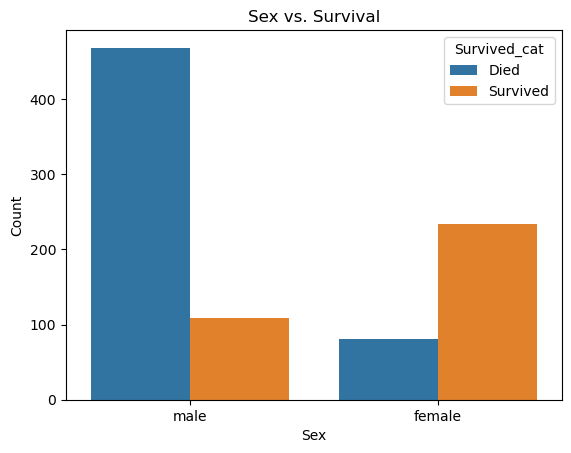

Survived_cat,Died,Survived
Sex,,
female,81,233
male,468,109


In [84]:
sns.countplot(x="Sex", hue="Survived_cat", data=df)
plt.title("Sex vs. Survival")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

pd.crosstab(df["Sex"], df["Survived_cat"])

## Passenger Class
1st, 2nd, 3rd class

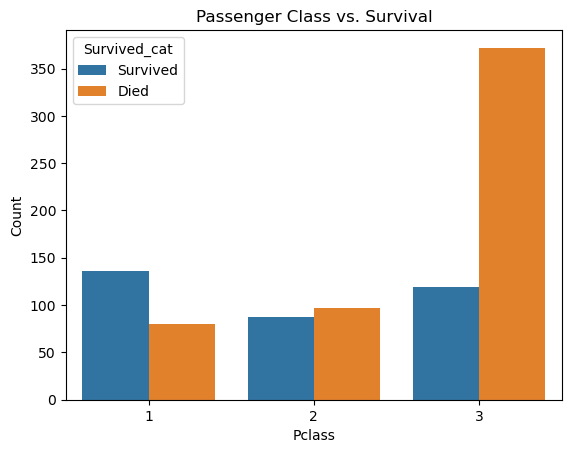

Survived_cat,Died,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


In [87]:
sns.countplot(x="Pclass", hue="Survived_cat", data=df)
plt.title("Passenger Class vs. Survival")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

pd.crosstab(df["Pclass"], df["Survived_cat"])

## Travel companions
I combine siblings/spouse + parents/children to make a companions count.

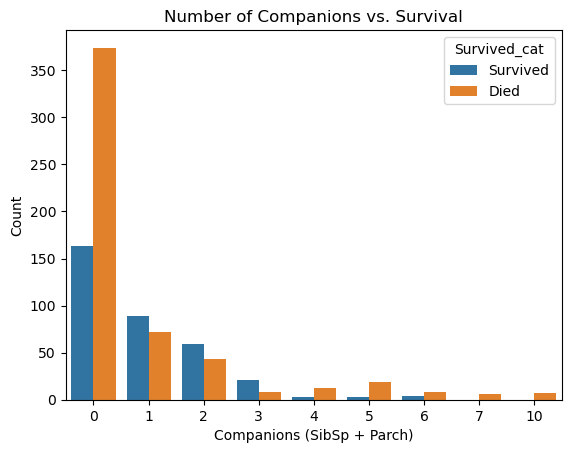

Survived_cat,Died,Survived
Companions,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [90]:
df["Companions"] = df["SibSp"] + df["Parch"]

sns.countplot(x="Companions", hue="Survived_cat", data=df)
plt.title("Number of Companions vs. Survival")
plt.xlabel("Companions (SibSp + Parch)")
plt.ylabel("Count")
plt.show()

pd.crosstab(df["Companions"], df["Survived_cat"]).head(10)

## Port of departure (Embarked)
C = Cherbourg, Q = Queenstown, S = Southampton.

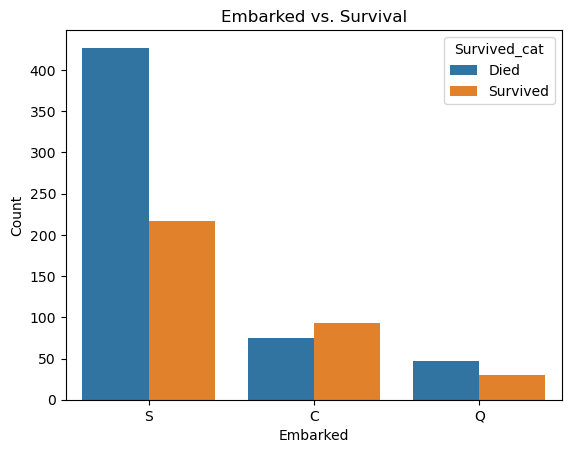

Survived_cat,Died,Survived
Embarked,,
C,75,93
Q,47,30
S,427,217


In [92]:
sns.countplot(x="Embarked", hue="Survived_cat", data=df)
plt.title("Embarked vs. Survival")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

pd.crosstab(df["Embarked"], df["Survived_cat"])

# Character Profiles

Most likely to survive:  
- Female
- 1st class 
- Younger groups do okay, so I allow Child or Young Adult  
- Has companions (family)  
- Higher fare group 
- Embarked can vary; Cherbourg had more 1st class

Least likely to survive:  
- Male  
- 3rd class  
- Adult or Senior  
- Traveling alone 
- Lower fare group  
- Many 3rd class boarded at Southampton

In [97]:
# Most likely to survive
likely = df.loc[
    (df["Sex"] == "female") &
    (df["Pclass"] == 1) &
    (df["AgeGroup"].isin(["Child","Young Adult"])) &
    (df["Companions"] > 0) &
    (df["FareGroup"].isin(["High","Very High"]))
]

# Least likely to survive
unlikely = df.loc[
    (df["Sex"] == "male") &
    (df["Pclass"] == 3) &
    (df["AgeGroup"].isin(["Adult","Senior"])) &
    (df["Companions"] == 0) &
    (df["FareGroup"].isin(["Low","Medium"]))
]

# show a few candidates from each
likely[["Name","Sex","Age","AgeGroup","Pclass","Fare","FareGroup","Companions","Embarked","Survived"]].head(5)

,Name,Sex,Age,AgeGroup,Pclass,Fare,FareGroup,Companions,Embarked,Survived
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Young Adult,1,53.1000,Very High,1,S,1
88,"Fortune, Miss. Mabel Helen",female,23.0,Young Adult,1,263.0000,Very High,5,S,1
136,"Newsom, Miss. Helen Monypeny",female,19.0,Young Adult,1,26.2833,High,2,S,1
151,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,Young Adult,1,66.6000,Very High,1,S,1
215,"Newell, Miss. Madeleine",female,31.0,Young Adult,1,113.2750,Very High,1,C,1


In [55]:
unlikely[["Name","Sex","Age","AgeGroup","Pclass","Fare","FareGroup","Companions","Embarked","Survived"]].head(5)

,Name,Sex,Age,AgeGroup,Pclass,Fare,FareGroup,Companions,Embarked,Survived
94,"Coxon, Mr. Daniel",male,59.0,Adult,3,7.2500,Low,0,S,0
108,"Rekic, Mr. Tido",male,38.0,Adult,3,7.8958,Low,0,S,0
116,"Connors, Mr. Patrick",male,70.5,Senior,3,7.7500,Low,0,Q,0
129,"Ekstrom, Mr. Johan",male,45.0,Adult,3,6.9750,Low,0,S,0
152,"Meo, Mr. Alfonzo",male,55.5,Adult,3,8.0500,Medium,0,S,0


## Pick one real passenger from each list
Below I just print a single name from each filtered table.  
I will look these names up on Encyclopedia Titanica and write one fact for each person.

https://www.encyclopedia-titanica.org/

In [100]:
# Safely grab a single example row from each group
most_like_name = likely["Name"].iloc[0] if len(likely) > 0 else "No match (adjust filters)"
least_like_name = unlikely["Name"].iloc[0] if len(unlikely) > 0 else "No match (adjust filters)"

print("Most-likely profile example:", most_like_name)
print("Least-likely profile example:", least_like_name)

Most-likely profile example: Futrelle, Mrs. Jacques Heath (Lily May Peel)
Least-likely profile example: Coxon, Mr. Daniel


# Conclusion
From the visuals and tables, the strongest signals were sex and passenger class.  
Women in 1st class with higher fares and family around had much better survival rates.  
Men in 3rd class, especially those traveling alone and paying lower fares, had poor outcomes.  
These patterns match the “women and children first” idea and the ship’s layout/access differences between classes.